In [1]:
import glob
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

### We have previously pre-processed and extracted holdings per period. We now use these data to compute efficiently imbalances

In [2]:
glob.glob('/scratch/Debbie_Miori/holdings_t/*')

['/scratch/Debbie_Miori/holdings_t/2018-09-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2014-06-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2016-09-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2014-09-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2020-09-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2016-06-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2016-12-31.csv',
 '/scratch/Debbie_Miori/holdings_t/2015-09-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2015-03-31.csv',
 '/scratch/Debbie_Miori/holdings_t/2017-12-31.csv',
 '/scratch/Debbie_Miori/holdings_t/2017-03-31.csv',
 '/scratch/Debbie_Miori/holdings_t/2017-09-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2019-12-31.csv',
 '/scratch/Debbie_Miori/holdings_t/2020-06-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2021-06-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2018-12-31.csv',
 '/scratch/Debbie_Miori/holdings_t/2018-06-30.csv',
 '/scratch/Debbie_Miori/holdings_t/2014-03-31.csv',
 '/scratch/Debbie_Miori/holdings_t/2018-03-31.csv',
 '/scratch/D

In [2]:
periods = ['2013-06-30', '2013-09-30', '2013-12-31', '2014-03-31', '2014-06-30',
 '2014-09-30', '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30',
 '2015-12-31', '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
 '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31', '2018-03-31',
 '2018-06-30', '2018-09-30', '2018-12-31', '2019-03-31', '2019-06-30',
 '2019-09-30', '2019-12-31', '2020-03-31', '2020-06-30', '2020-09-30',
 '2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30']

In [3]:
path = '/scratch/Debbie_Miori/holdings_t/'

# --------------------------------

In [5]:
data_period = {}
for period in tqdm(periods):
    data = pd.read_csv('/scratch/Debbie_Miori/holdings_t/'+period+'.csv')
    data.columns = ['cik'] + list(data.columns[1:])
    data = data.set_index('cik')
    data_period[period] = data

  3%|█▎                                          | 1/34 [01:23<45:41, 83.07s/it]


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [371]:
"""
    Compute deltas of holdings (in shares) between each two consecutive periods
"""

data_deltas = {}
# we are effectively computing variations so the first one needed to start the series
for p in range(1, len(periods)):
    subtraction = data_period[periods[p]].subtract(data_period[periods[p-1]]).fillna(0)
    data_deltas[periods[p]] = subtraction

In [374]:
data_deltas[periods[1]].head(1)

,000000641,000003129,000020038,000029893,000031286,000053678,000068766,000182663,000182667,000213768,...,y8565j101,y8565j127,y8565n102,y85830100,y85830126,y9865d109,zz7244796,zzc17u3n4,zzc2deh71,zzz9995b1
cik,,,,,,,,,,,,,,,,,,,,,
2230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from tqdm import tqdm

In [392]:
# Some specific securities do not see changes, actually quite a bit... Is that some kind of noise?
# Which securities are the ones just kept?
# Probably they are just held by one fund only and this fund did not change its allocation

for period in periods[1:]:
    subtraction = data_deltas[period]
    same = []
    for col in subtraction.columns:
        vals = list(subtraction.loc[:, col])
        result = all(element == 0 for element in vals)
        if result:
            same.append(col)
    print(period, len(same), len(subtraction.columns), len(same)/len(subtraction.columns))
    data_deltas[period] = subtraction.drop(same, axis=1)

2013-09-30 9127 22884 0.39883761580143334
2013-12-31 8405 23478 0.3579947184598347
2014-03-31 8429 23316 0.36151140847486707
2014-06-30 8074 23167 0.34851297103638795
2014-09-30 7985 23208 0.34406239227852464
2014-12-31 9853 24779 0.3976350942330199
2015-03-31 9456 24617 0.38412479181053744
2015-06-30 8862 24006 0.3691577105723569
2015-09-30 8817 23454 0.37592734714760806
2015-12-31 9061 23357 0.3879350944042471
2016-03-31 8560 22610 0.37859354268023
2016-06-30 9304 23281 0.3996391907564108
2016-09-30 8907 22842 0.389939584975046
2016-12-31 9485 22941 0.413451898347936
2017-03-31 8571 22000 0.3895909090909091
2017-06-30 7020 20443 0.34339382673775865
2017-09-30 6672 20113 0.3317257495152389
2017-12-31 6664 20344 0.32756586708611873
2018-03-31 6581 20175 0.32619578686493184
2018-06-30 6655 19982 0.33304974477029325
2018-09-30 7247 21003 0.3450459458172642
2018-12-31 7291 21058 0.3462342102763795
2019-03-31 7690 21021 0.36582465153893723
2019-06-30 7666 20891 0.3669522760997559
2019-09-3

In [523]:
#have a look
data_deltas[periods[1]]

,000029893,000031286,000068766,000182663,000213768,000252050,000304105,000306K10,000360206,000361105,...,y75638125,y79985209,y8162k121,y81669106,y8564M105,y8564m105,y8564w103,y8565J101,y8565j101,y8565j127
cik,,,,,,,,,,,,,,,,,,,,,
2230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6810.0,-1161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1730525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1731876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [524]:
"""
    Compute how many unique stocks we are considering in each period
"""

for period in periods[1:]:
    x = data_deltas[period]
    unique = np.unique([cusip[:6] for cusip in x.columns])
    print(len(unique))

10869
11117
11314
11486
11554
11516
11599
11636
11324
10917
10708
10634
10475
9957
9957
9932
9894
10007
10012
9903
10166
10011
9740
9628
9634
9641
9564
9400
9399
9401
9849
10272
10637


### Consider another dataset that will be used to connect stocks deltas and imbalances to prices (CUSIP to TICKER)

In [4]:
stocks_info = pd.read_csv('/home/miori/Desktop/13F2022/stocks.csv')
stocks_info.head()

,PERMNO,PERMCO,HTICK,HTSYMBOL,CUSIP
0,10000,7952,NaN,OMFGA,68391610
1,10001,7953,NaN,EGAS,36720410
2,10002,7954,NaN,BTFG,05978R10
3,10003,7957,NaN,GCBK,39031810
4,10004,7960,NaN,CLSO,18906310


In [5]:
stocks_info['CUSIP6'] = [c[:6] for c in stocks_info['CUSIP']]
stocks_info

,PERMNO,PERMCO,HTICK,HTSYMBOL,CUSIP,CUSIP6
0,10000,7952,NaN,OMFGA,68391610,683916
1,10001,7953,NaN,EGAS,36720410,367204
2,10002,7954,NaN,BTFG,05978R10,05978R
3,10003,7957,NaN,GCBK,39031810,390318
4,10004,7960,NaN,CLSO,18906310,189063
...,...,...,...,...,...,...
36141,93432,53450,NaN,JGBO,47737R10,47737R
36142,93433,53451,NaN,VLTC,92870X30,92870X
36143,93434,53427,SANW,SANW,78513510,785135
36144,93435,53452,NaN,SCEI,82936G20,82936G


In [494]:
data_deltas_clean = {}

for period in tqdm(periods[1:]):
    x = data_deltas[period]
    
    unique = np.unique([cusip[:6] for cusip in x.columns])
    cusips6 = {k: [] for k in unique}
    for c in x.columns:
        cusips6[c[:6]].append(c)
        
    x_new = pd.DataFrame.from_dict({'cik': x.index})
    not_found = 0
    for c6, c9 in cusips6.items():
        tick = list(stocks_info[stocks_info.CUSIP6==c6].HTSYMBOL)
        if len(tick) == 0:
            not_found += 1
        else:
            x_new[tick[0]] = list(x.loc[:, c9].sum(axis=1))
    x_new = x_new.set_index('cik')
    
    print('not_found_tickers: ', not_found)
    data_deltas_clean[period] = x_new

  0%|          | 0/33 [00:00<?, ?it/s]<ipython-input-494-f249869a3a58>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_new[tick[0]] = list(x.loc[:, c9].sum(axis=1))
  3%|▎         | 1/33 [00:52<27:58, 52.46s/it]

not_found_tickers:  5668


  6%|▌         | 2/33 [01:46<27:29, 53.21s/it]

not_found_tickers:  5899


  9%|▉         | 3/33 [02:40<26:57, 53.91s/it]

not_found_tickers:  6036


 12%|█▏        | 4/33 [03:36<26:24, 54.65s/it]

not_found_tickers:  6162


 15%|█▌        | 5/33 [04:32<25:42, 55.09s/it]

not_found_tickers:  6190


 18%|█▊        | 6/33 [05:28<24:57, 55.47s/it]

not_found_tickers:  6111


 21%|██        | 7/33 [06:25<24:11, 55.82s/it]

not_found_tickers:  6156


 24%|██▍       | 8/33 [07:22<23:25, 56.20s/it]

not_found_tickers:  6156


 27%|██▋       | 9/33 [08:18<22:24, 56.03s/it]

not_found_tickers:  5817


 30%|███       | 10/33 [09:12<21:18, 55.60s/it]

not_found_tickers:  5427


 33%|███▎      | 11/33 [10:06<20:13, 55.18s/it]

not_found_tickers:  5182


 36%|███▋      | 12/33 [11:00<19:09, 54.75s/it]

not_found_tickers:  5173


 39%|███▉      | 13/33 [11:53<18:06, 54.31s/it]

not_found_tickers:  5067


 42%|████▏     | 14/33 [12:45<16:54, 53.38s/it]

not_found_tickers:  4586


 45%|████▌     | 15/33 [13:36<15:47, 52.62s/it]

not_found_tickers:  4567


 48%|████▊     | 16/33 [14:26<14:43, 51.99s/it]

not_found_tickers:  4568


 52%|█████▏    | 17/33 [15:16<13:44, 51.51s/it]

not_found_tickers:  4534


 55%|█████▍    | 18/33 [16:08<12:51, 51.43s/it]

not_found_tickers:  4651


 58%|█████▊    | 19/33 [16:59<12:00, 51.47s/it]

not_found_tickers:  4600


 61%|██████    | 20/33 [17:50<11:07, 51.35s/it]

not_found_tickers:  4493


 64%|██████▎   | 21/33 [18:43<10:21, 51.76s/it]

not_found_tickers:  4640


 67%|██████▋   | 22/33 [19:36<09:31, 51.98s/it]

not_found_tickers:  4505


 70%|██████▉   | 23/33 [20:27<08:38, 51.90s/it]

not_found_tickers:  4219


 73%|███████▎  | 24/33 [21:18<07:44, 51.60s/it]

not_found_tickers:  4107


 76%|███████▌  | 25/33 [22:09<06:51, 51.45s/it]

not_found_tickers:  4067


 79%|███████▉  | 26/33 [23:01<06:01, 51.61s/it]

not_found_tickers:  4084


 82%|████████▏ | 27/33 [23:53<05:10, 51.72s/it]

not_found_tickers:  3929


 85%|████████▍ | 28/33 [24:44<04:17, 51.53s/it]

not_found_tickers:  3797


 88%|████████▊ | 29/33 [25:35<03:25, 51.41s/it]

not_found_tickers:  3760


 91%|█████████ | 30/33 [26:28<02:35, 51.71s/it]

not_found_tickers:  3649


 94%|█████████▍| 31/33 [27:23<01:45, 52.88s/it]

not_found_tickers:  3830


 97%|█████████▋| 32/33 [28:22<00:54, 54.51s/it]

not_found_tickers:  3902


100%|██████████| 33/33 [29:23<00:00, 53.43s/it]

not_found_tickers:  3968


In [493]:
data_deltas_clean[periods[1]]

,AAON,AIR,ABB,ABCM,ACCO,ACNB,ADCT,ABM,ADT,AEPI,...,SB,STNG,SDLP,SBLK,GASS,TGP,TK,TOO,TNK,TOPS
cik,,,,,,,,,,,,,,,,,,,,,
2230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5272,6810.0,-1161.0,0.0,0.0,-1958.0,0.0,0.0,-344.0,1570.0,51.0,...,0.0,10293.0,0.0,0.0,0.0,-407.0,658.0,1107.0,-1670.0,0.0
7195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1730525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1731876,0.0,0.0,8700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Finally compute imbalances for the stocks for which we have the associated ticker

In [5]:
def compute_imbalances(df_delta):
    
    deltas, imb_vols, imb_trades = [], [], []
    
    cusips_final = []
    numb_funds = []
    for cusip in df_delta.columns:
        col = df_delta.loc[:, cusip]

        pos = [diff_shares for diff_shares in col if diff_shares > 0]
        B_vol = sum(pos)
        B_trade = len(pos)

        neg = [-1*diff_shares for diff_shares in col if diff_shares < 0]
        S_vol = sum(neg)
        S_trade = len(neg)
        
        
        if (B_vol+S_vol) != 0:
            
            #print(B_vol, S_vol)

            imb_vol = (B_vol-S_vol)/(B_vol+S_vol)
            imb_trade = (B_trade-S_trade)/(B_trade+S_trade)

            cusips_final.append(cusip)
            numb_funds.append(len(pos)+len(neg))
            deltas.append(B_vol - S_vol)
            imb_vols.append(imb_vol)
            imb_trades.append(imb_trade)
            
            #print('quantities', B_vol - S_vol, B_vol, S_vol, imb_vol)
        
    return cusips_final, numb_funds, deltas, imb_vols, imb_trades

In [510]:
# Compute our final matrix of data

imb_time = {}
for period in tqdm(periods[1:]):
    
    #cols_data = ['date', 'cusip', 'n_funds', 'delta_vol', 'imb_vol', 'imb_trade']
    cols_data = ['date', 'ticker', 'n_funds', 'delta_vol', 'imb_vol', 'imb_trade']
    imb = dict(zip(cols_data, [[] for _ in range(len(cols_data))]))
    
    #df_delta = data_deltas[period]
    df_delta = data_deltas_clean[period]
    
    cusips_final, numb_funds, deltas, imb_vols, imb_trades = compute_imbalances(df_delta)
    
    imb['date'] = [period] * len(cusips_final)
    #imb['cusip'] = cusips_final
    imb['ticker'] = cusips_final
    imb['n_funds'] = numb_funds
    imb['delta_vol'] = deltas
    imb['imb_vol'] = imb_vols
    imb['imb_trade'] = imb_trades
    
    df_imb = pd.DataFrame.from_dict(imb)
    
    imb_time[period] = df_imb

100%|██████████| 33/33 [04:11<00:00,  7.61s/it]


In [512]:
#import pickle
#with open("/scratch/Debbie_Miori/data_stats_imb_tickers.pickle", "wb") as output_file:
#    pickle.dump(imb_time, output_file)

In [553]:
print(imb_time.keys())

def matrix_imbalances(imb_time, imb_type, n_funds_threshold=0):

    result = {}
    for period in imb_time.keys():
        df_imb = imb_time[period]
        ####
        # Added to put a minimum requirement of number of funds holding the asset
        ####
        df_imb = df_imb[df_imb.n_funds>=n_funds_threshold]
        ####
        #stocks = list(df_imb.cusip)
        stocks = list(df_imb.ticker)
        imbalances = list(df_imb[imb_type])
        
        result[period] = dict(zip(stocks, imbalances))
      
    final_df = pd.DataFrame.from_dict(result, orient='index').fillna(0)
    final_df = final_df.T
    final_df = final_df.sort_index(axis=1)
    
    return final_df

m0vol = matrix_imbalances(imb_time, imb_type='imb_vol', n_funds_threshold=0)
m0trade = matrix_imbalances(imb_time, imb_type='imb_trade', n_funds_threshold=0)
m0vol.to_csv('/scratch/Debbie_Miori/m0vol.csv')
m0trade.to_csv('/scratch/Debbie_Miori/m0trade.csv')

m10vol = matrix_imbalances(imb_time, imb_type='imb_vol', n_funds_threshold=10)
m10trade = matrix_imbalances(imb_time, imb_type='imb_trade', n_funds_threshold=10)
m10vol.to_csv('/scratch/Debbie_Miori/m10vol.csv')
m10trade.to_csv('/scratch/Debbie_Miori/m10trade.csv')

m50vol = matrix_imbalances(imb_time, imb_type='imb_vol', n_funds_threshold=50)
m50trade = matrix_imbalances(imb_time, imb_type='imb_trade', n_funds_threshold=50)
m50vol.to_csv('/scratch/Debbie_Miori/m50vol.csv')
m50trade.to_csv('/scratch/Debbie_Miori/m50trade.csv')

m100vol = matrix_imbalances(imb_time, imb_type='imb_vol', n_funds_threshold=100)
m100trade = matrix_imbalances(imb_time, imb_type='imb_trade', n_funds_threshold=100)
m100vol.to_csv('/scratch/Debbie_Miori/m100vol.csv')
m100trade.to_csv('/scratch/Debbie_Miori/m100trade.csv')

m150vol = matrix_imbalances(imb_time, imb_type='imb_vol', n_funds_threshold=150)
m150trade = matrix_imbalances(imb_time, imb_type='imb_trade', n_funds_threshold=150)
m150vol.to_csv('/scratch/Debbie_Miori/m150vol.csv')
m150trade.to_csv('/scratch/Debbie_Miori/m150trade.csv')

m200vol = matrix_imbalances(imb_time, imb_type='imb_vol', n_funds_threshold=200)
m200trade = matrix_imbalances(imb_time, imb_type='imb_trade', n_funds_threshold=200)
m200vol.to_csv('/scratch/Debbie_Miori/m200vol.csv')
m200trade.to_csv('/scratch/Debbie_Miori/m200trade.csv')

m500vol = matrix_imbalances(imb_time, imb_type='imb_vol', n_funds_threshold=500)
m500trade = matrix_imbalances(imb_time, imb_type='imb_trade', n_funds_threshold=500)
m500vol.to_csv('/scratch/Debbie_Miori/m500vol.csv')
m500trade.to_csv('/scratch/Debbie_Miori/m500trade.csv')

m0vol

,2013-09-30,2013-12-31,2014-03-31,2014-06-30,2014-09-30,2014-12-31,2015-03-31,2015-06-30,2015-09-30,2015-12-31,...,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30
AAON,0.790965,0.079068,0.115274,0.195332,0.902937,-0.238601,0.401515,-0.094083,0.782770,-0.787387,...,0.169768,0.345903,-0.324287,-0.481499,0.292072,0.095766,-0.057566,-0.170128,-0.144227,-0.124999
AIR,0.116066,0.319374,0.094202,-0.242866,-0.286144,-0.296226,0.020561,-0.400145,0.374040,-0.538848,...,0.061644,0.111674,-0.006830,-0.086408,-0.069279,-0.102640,0.122286,0.202172,-0.056220,0.158322
ABB,0.261518,-0.152041,0.337249,-0.130536,0.254795,-0.021759,0.165383,-0.568019,-0.064938,-0.212219,...,-0.480653,0.335254,-0.250428,-0.352526,-0.450643,0.421068,0.212659,0.198276,-0.250720,0.346604
ABCM,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.733366,0.337418,-0.190471
ACCO,0.017621,-0.144191,-0.067117,0.019632,-0.214329,-0.069259,0.057734,-0.096692,0.445263,-0.401187,...,-0.432671,-0.233461,0.022728,-0.155482,0.000265,-0.045652,-0.043766,-0.202619,-0.035825,0.025515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMWB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.074975
TBLA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.587435
WKME,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.684676
ATAI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.197828


# --------------------------------

### For each period in time, we now have imbalances for the related stocks and some other summary stats. We can plot some of them to have a better idea of trends etc.

In [5]:
import pickle
with open("/scratch/Debbie_Miori/data_stats_imb_tickers.pickle", "rb") as output_file:
    imb_time = pickle.load(output_file)

In [6]:
look = imb_time[periods[1]]
look.head()

,date,ticker,n_funds,delta_vol,imb_vol,imb_trade
0,2013-09-30,AAON,124,5758627.0,0.790965,0.596774
1,2013-09-30,AIR,165,1578233.0,0.116066,0.042424
2,2013-09-30,ABB,287,3882848.0,0.261518,0.080139
3,2013-09-30,ABCM,1,3214.0,1.000000,1.000000
4,2013-09-30,ACCO,134,283737.0,0.017621,0.059701


In [7]:
plt.rcParams.update({'font.size': 14})

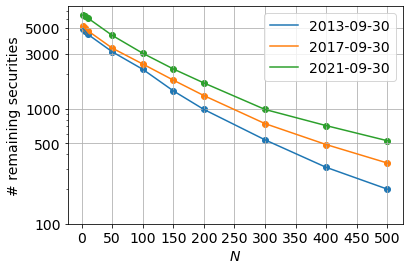

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for period in ['2013-09-30', '2017-09-30', '2021-09-30']:
    look = imb_time[period]
    stocks_staying = []
    thresholds = [2, 5, 10, 50, 100, 150, 200, 300, 400, 500]
    for t in thresholds:
        stocks_staying.append(len(look[look.n_funds>=t]))
        
    
    ax.plot(thresholds, stocks_staying, label=period)
    ax.scatter(thresholds, stocks_staying)
    
ax.set_yscale('log')
plt.grid()

plt.xticks(np.arange(0, 501, 50), labels = np.arange(0, 501, 50))
plt.yticks([100, 500, 1000, 3000, 5000], labels = [100, 500, 1000, 3000, 5000])
plt.xlabel(r'$N$')
plt.ylabel('# remaining securities')
plt.legend()
plt.savefig('plots-paper/threshold_active_funds.png', dpi=200, format='png')
plt.show()

In [11]:
imb_time['2013-09-30']

,date,ticker,n_funds,delta_vol,imb_vol,imb_trade
0,2013-09-30,AAON,124,5758627.0,0.790965,0.596774
1,2013-09-30,AIR,165,1578233.0,0.116066,0.042424
2,2013-09-30,ABB,287,3882848.0,0.261518,0.080139
3,2013-09-30,ABCM,1,3214.0,1.000000,1.000000
4,2013-09-30,ACCO,134,283737.0,0.017621,0.059701
...,...,...,...,...,...,...
5099,2013-09-30,TGP,103,-802125.0,-0.119747,0.048544
5100,2013-09-30,TK,119,1642517.0,0.170504,0.176471
5101,2013-09-30,TOO,72,-937623.0,-0.194156,0.166667
5102,2013-09-30,TNK,68,137134.0,0.041931,-0.058824


In [17]:
plt.rcParams.update({'font.size': 12})

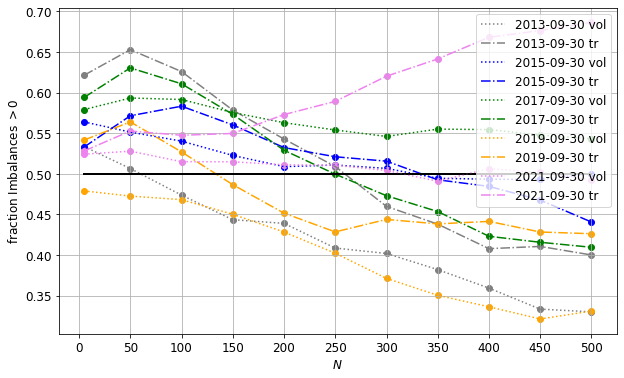

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

cols = {
    '2013-09-30': 'grey',
    '2015-09-30': 'blue',
    '2017-09-30': 'green',
    '2019-09-30': 'orange',
    '2021-09-30': 'violet'
}

for period in ['2013-09-30', '2015-09-30', '2017-09-30', '2019-09-30', '2021-09-30']:
    look = imb_time[period]
    stocks_staying = []
    stocks_staying_volP = []
    stocks_staying_tradeP = []
    thresholds = [5, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    for t in thresholds:
        temp = look[look.n_funds>=t]
        temp_volP = temp[temp.imb_vol>0]
        temp_tradeP = temp[temp.imb_trade>0]
        
        stocks_staying.append(len(temp))
        stocks_staying_volP.append(len(temp_volP)/len(temp))
        stocks_staying_tradeP.append(len(temp_tradeP)/len(temp))
    
    ax.plot(thresholds, stocks_staying_volP, c=cols[period], linestyle=':', label=period+' vol')
    ax.scatter(thresholds, stocks_staying_volP, c=cols[period])
    
    ax.plot(thresholds, stocks_staying_tradeP, c=cols[period], linestyle='-.', label=period+' tr')
    ax.scatter(thresholds, stocks_staying_tradeP, c=cols[period])
    
    ax.plot(thresholds, [0.5]*len(thresholds), c='black')
    
#ax.set_yscale('log')
plt.grid()

plt.xticks(np.arange(0, 501, 50), labels = np.arange(0, 501, 50))
#plt.yticks([100, 500, 1000, 3000, 5000], labels = [100, 500, 1000, 3000, 5000])
plt.xlabel(r'$N$')
plt.ylabel(r'fraction Imbalances $>0$')
plt.legend(loc='upper right')
plt.savefig('plots-paper/threshold_active_funds_pos_neg.png', dpi=200, format='png')
plt.show()

In [19]:
imb_time.keys()

dict_keys(['2013-09-30', '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31', '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31', '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31', '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30'])

In [20]:
from datetime import datetime
periods_dt = [datetime.strptime(p, '%Y-%m-%d') for p in periods[1:]]

In [21]:
from datetime import datetime

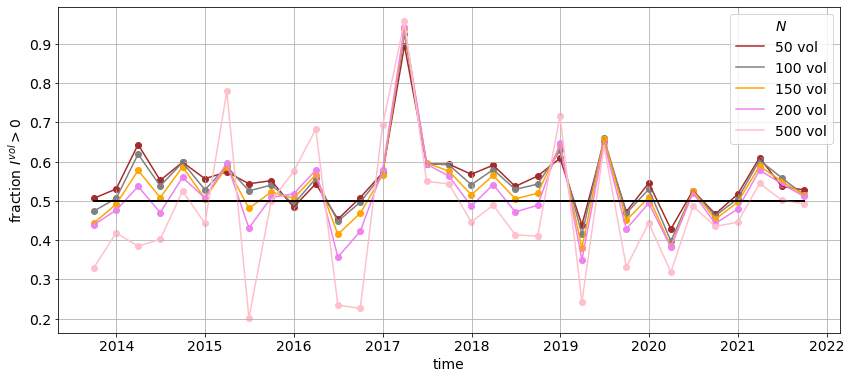

In [23]:
plt.rcParams.update({'font.size': 14})

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))

cols = {
    50: 'brown',
    100: 'grey',
    150: 'orange',
    200: 'violet',
    500: 'pink'
}

thresholds = [50, 100, 150, 200, 500]
for t in thresholds:
    
    stocks_staying = []
    stocks_staying_volP = []
    stocks_staying_tradeP = []
    
    for period in periods[1:]:
        look = imb_time[period]
        temp = look[look.n_funds>=t]
        temp_volP = temp[temp.imb_vol>0]
        temp_tradeP = temp[temp.imb_trade>0]
        
        stocks_staying.append(len(temp))
        stocks_staying_volP.append(len(temp_volP)/len(temp))
        stocks_staying_tradeP.append(len(temp_tradeP)/len(temp))
    
    ax.plot(periods_dt, stocks_staying_volP, c=cols[t], linestyle='-', label=str(t)+' vol')
    ax.scatter(periods_dt, stocks_staying_volP, c=cols[t])
    
    #ax.plot(periods_dt, stocks_staying_tradeP, c=cols[t], linestyle='-.', label=str(t))
    #ax.scatter(periods_dt, stocks_staying_tradeP, c=cols[t])
    
    ax.plot(periods_dt, [0.5]*len(periods_dt), c='black')
    
#ax.set_yscale('log')
plt.grid()

#plt.yticks([100, 500, 1000, 3000, 5000], labels = [100, 500, 1000, 3000, 5000])
plt.xlabel('time')
plt.ylabel(r'fraction $I^{vol} >0$')
plt.legend(title=r'$N$')
plt.savefig('plots-paper/threshold_active_funds_pos_neg_time_trade.png', dpi=200, format='png')
plt.show()

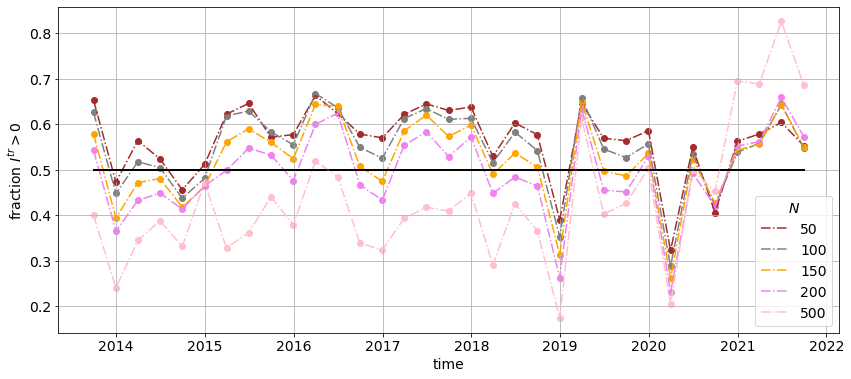

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))

cols = {
    50: 'brown',
    100: 'grey',
    150: 'orange',
    200: 'violet',
    500: 'pink'
}

thresholds = [50, 100, 150, 200, 500]
for t in thresholds:
    
    stocks_staying = []
    stocks_staying_volP = []
    stocks_staying_tradeP = []
    
    for period in periods[1:]:
        look = imb_time[period]
        temp = look[look.n_funds>=t]
        temp_volP = temp[temp.imb_vol>0]
        temp_tradeP = temp[temp.imb_trade>0]
        
        stocks_staying.append(len(temp))
        stocks_staying_volP.append(len(temp_volP)/len(temp))
        stocks_staying_tradeP.append(len(temp_tradeP)/len(temp))
    
    #ax.plot(periods_dt, stocks_staying_volP, c=cols[t], linestyle='-', label=str(t)+' vol')
    #ax.scatter(periods_dt, stocks_staying_volP, c=cols[t])
    
    ax.plot(periods_dt, stocks_staying_tradeP, c=cols[t], linestyle='-.', label=str(t))
    ax.scatter(periods_dt, stocks_staying_tradeP, c=cols[t])
    
    ax.plot(periods_dt, [0.5]*len(periods_dt), c='black')
    
#ax.set_yscale('log')
plt.grid()

#plt.yticks([100, 500, 1000, 3000, 5000], labels = [100, 500, 1000, 3000, 5000])
plt.xlabel('time')
plt.ylabel(r'fraction $I^{tr} >0$')
plt.legend(title=r'$N$')
plt.savefig('plots-paper/threshold_active_funds_pos_neg_time_trade.png', dpi=200, format='png')
plt.show()